###Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Loading Data

In [2]:
df=pd.read_csv("/content/insurance_dataset.csv")

In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
df.shape

(45211, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  Outcome         45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education_qual,0
call_type,0
day,0
mon,0
dur,0
num_calls,0
prev_outcome,0


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Outcome'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  Outcome         45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [10]:
df.describe()


,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [11]:
df.duplicated().sum()

6

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.duplicated().sum()

0

In [14]:
df["Outcome"].value_counts()

,count
Outcome,
no,39916
yes,5289


##Exploratory Data Analysis

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'Outcome'],
      dtype='object')

we have to compare all the columns with conversion column

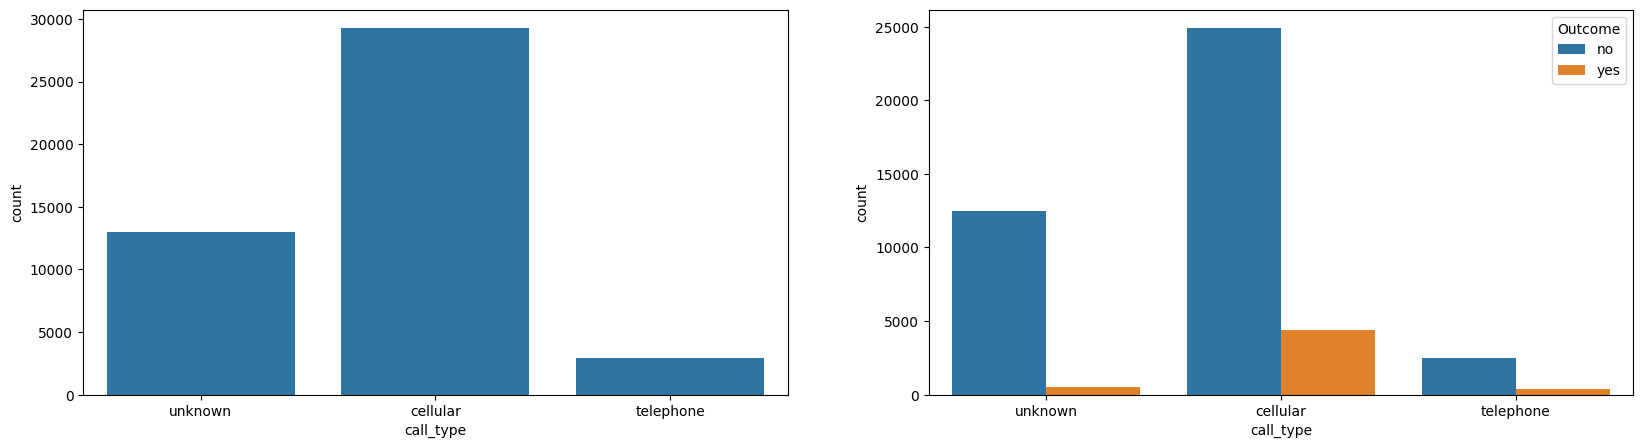

In [ ]:
fig, axes=plt.subplots(ncols=2,figsize= (20,5))
sns.countplot(x= 'call_type',ax= axes[0], data=df)
sns.countplot(x='call_type', hue= 'Outcome', ax=axes[1], data=df)
plt.show()

In thi above plot we conclude that:
     Cellular type conversion is contributing a lot than other types

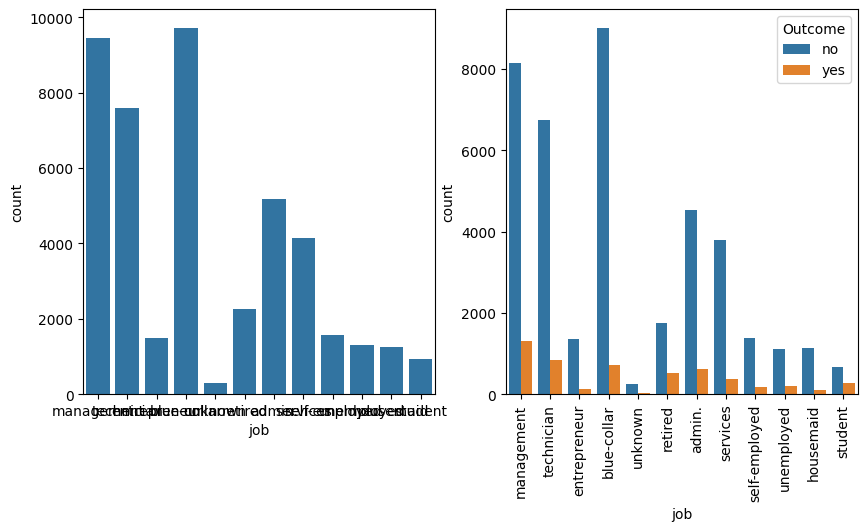

In [ ]:
fig, axes= plt.subplots(ncols=2, figsize= (10,5))
sns.countplot(x= 'job', ax= axes[0], data=df)
sns.countplot(x= 'job', ax= axes[1], hue= 'Outcome', data=df)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In this above plots we conclude that:


*   The most targetted Cutomer:Blue collar, but comparing wih conversion rate,hte blu collar customer conversion rate is very low. so, we concentrate with other people
*   High range of Conversion rate: Mangement occupy maximum number of conversion rate.



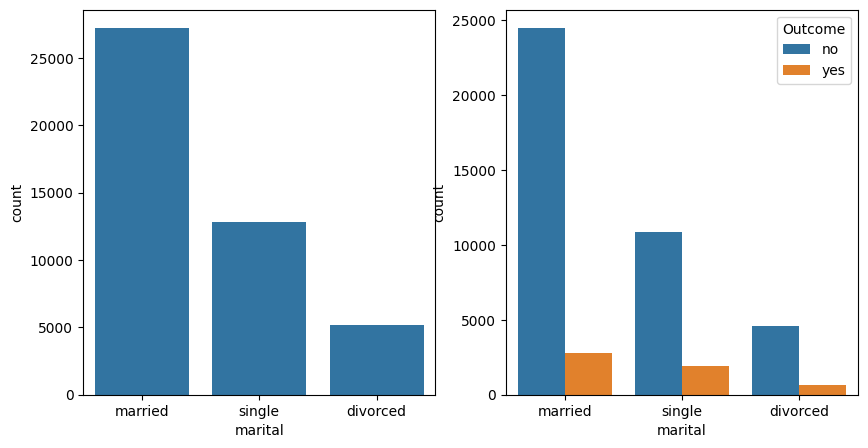

In [ ]:
fig, axes= plt.subplots(ncols=2, figsize= (10,5))
sns.countplot(x= 'marital', ax= axes[0], data=df)
sns.countplot(x='marital', hue= 'Outcome', ax= axes[1], data=df)
plt.show()

In this above plot we conclude that:
    Divorced people are not opt for insurance

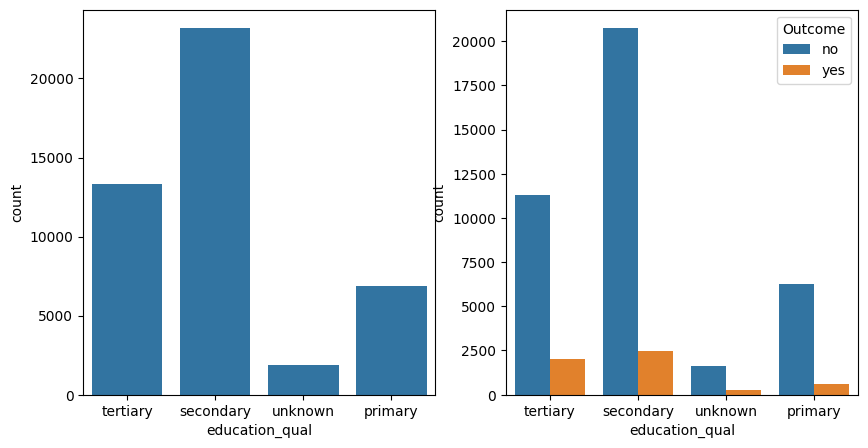

In [ ]:
fig, axes= plt.subplots(ncols= 2, figsize=(10,5))
sns.countplot(x= 'education_qual', ax= axes[0], data=df)
sns.countplot(x= 'education_qual', hue= 'Outcome', ax= axes[1], data=df)
plt.show()

In this above plot we conclude that:
     people with seconary/tetiary are opt for insurance

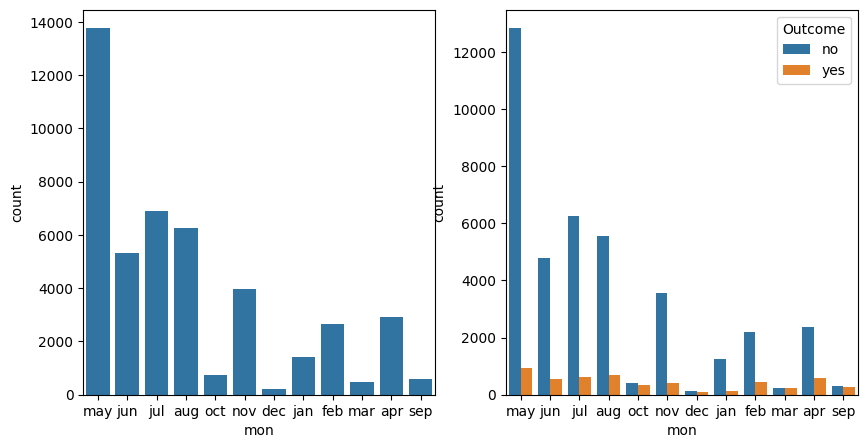

In [ ]:
fig, axes= plt.subplots(ncols= 2, figsize=(10,5))
sns.countplot(x= 'mon', ax= axes[0], data=df)
sns.countplot(x= 'mon', hue= 'Outcome', ax= axes[1], data=df)
plt.show()

In this plot we conclude that:
     people opt for insurance during start of finacial year.

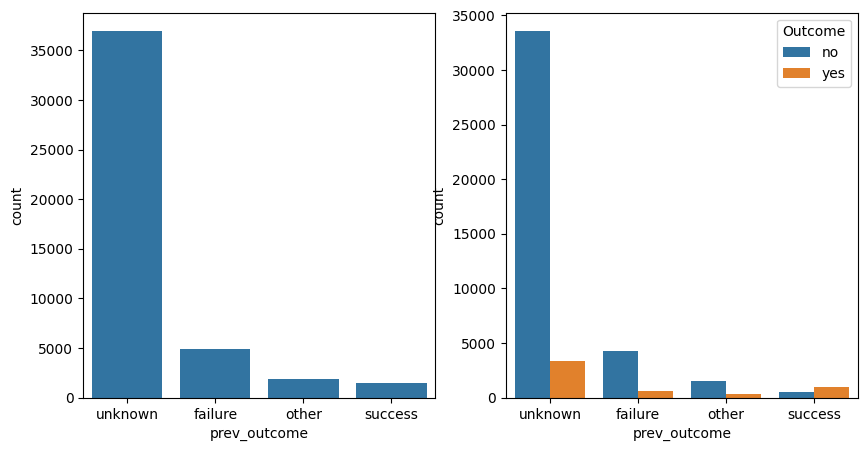

In [ ]:
fig, axes=plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x='prev_outcome',ax=axes[0],data=df)
sns.countplot(x='prev_outcome', hue='Outcome',ax=axes[1], data=df)
plt.show()

In this plot we conclue that:
     Unknown type occupy more.

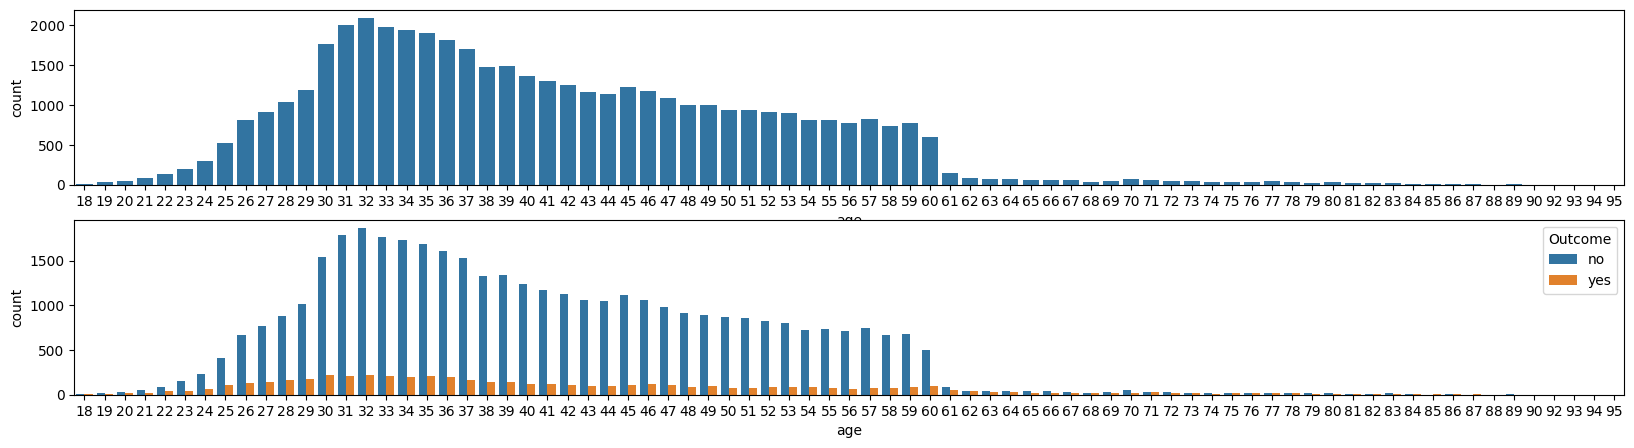

In [ ]:
fig, axes= plt.subplots(nrows= 2, figsize= (20,5))
sns.countplot(x='age', ax= axes[0], data= df)
sns.countplot(x= 'age', ax= axes[1], hue= 'Outcome', data= df)
plt.show()

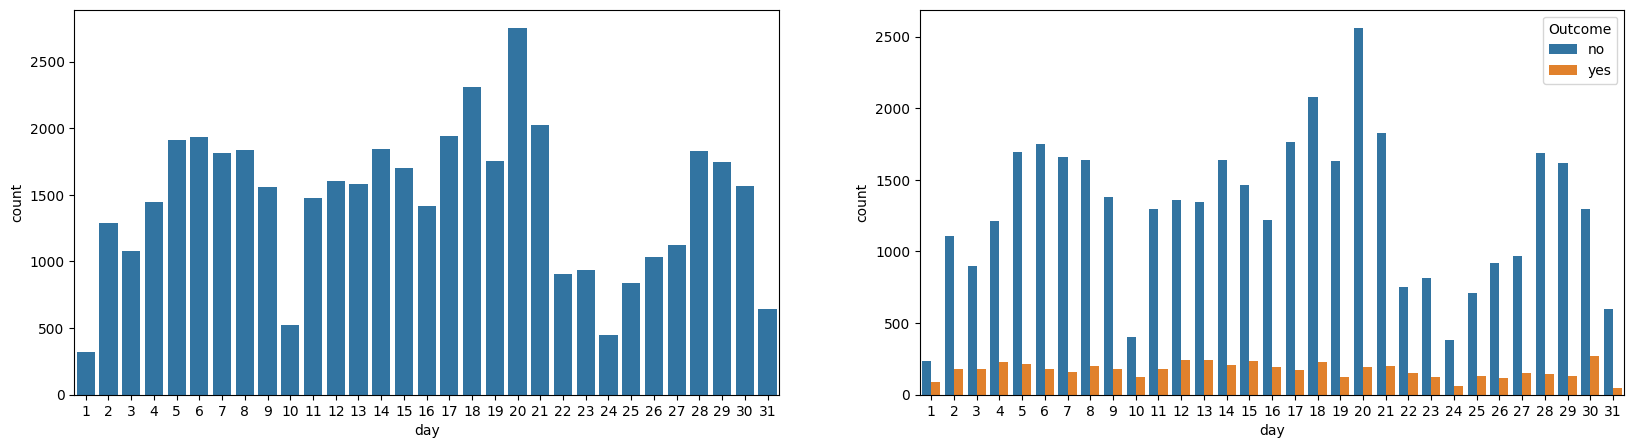

In [ ]:
fig, axes= plt.subplots(ncols=2, figsize= (20,5))
sns.countplot(x='day', ax= axes[0], data= df)
sns.countplot(x='day', hue= 'Outcome', ax= axes[1], data= df)
plt.show()

We cant find any insights from this day column

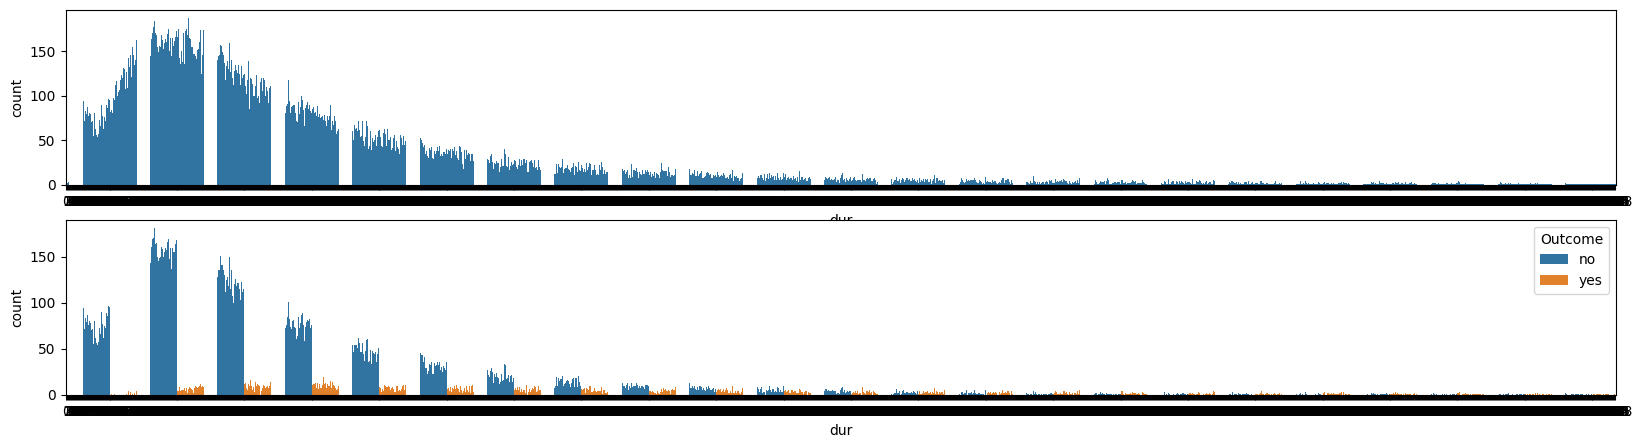

In [ ]:
fig, axes= plt.subplots(nrows=2, figsize= (20, 5))
sns.countplot(x='dur', ax= axes[0], data= df)
sns.countplot(x='dur', ax= axes[1], hue= 'Outcome', data= df)
plt.show()

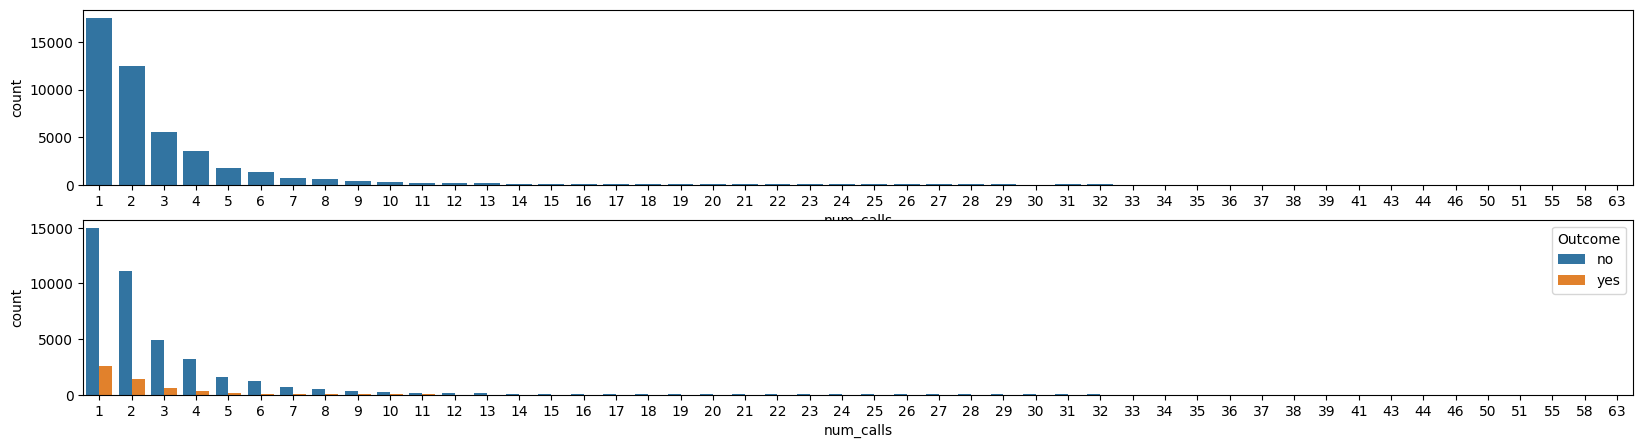

In [ ]:
fig, axes= plt.subplots(nrows= 2, figsize= (20,5))
sns.countplot(x='num_calls', ax= axes[0], data= df)
sns.countplot(x= 'num_calls', ax= axes[1], hue= 'Outcome', data= df)
plt.show()

In this plot we conclue that:
     Most of the customers opt for insurance inn maximum 3 atttempts
     so, we have to avoid reaching cutomer more than 3 attempts

##Machine Learning

Our ML model only work with numerical datas only. So, we have to use LableEncoder for converting text data into numeric data

In [15]:
text_data=df.select_dtypes(include= 'object').columns
for col1 in text_data:
  ordinal_label= {k : i for i, k in enumerate(df[col1].unique(), 0)}
  df[col1]= df[col1].map(ordinal_label).astype(int)

In [16]:
df.dtypes

,0
age,int64
job,int64
marital,int64
education_qual,int64
call_type,int64
day,int64
mon,int64
dur,int64
num_calls,int64
prev_outcome,int64


In [17]:
df['Outcome'].value_counts()

,count
Outcome,
0,39916
1,5289


In [18]:
X= df.drop("Outcome", axis= 1)
Y= df["Outcome"]

In [19]:
X.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome'],
      dtype='object')

In [20]:
Y


,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.2, random_state=0)
x_train.shape, x_test.shape

((36164, 10), (9041, 10))

##Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
standardscaler= StandardScaler()
standardscaler.fit(x_train)
transform_x_train= standardscaler.transform(x_train)
transform_x_test= standardscaler.transform(x_test)

##Heatmap using pearson Correlation Coefficient

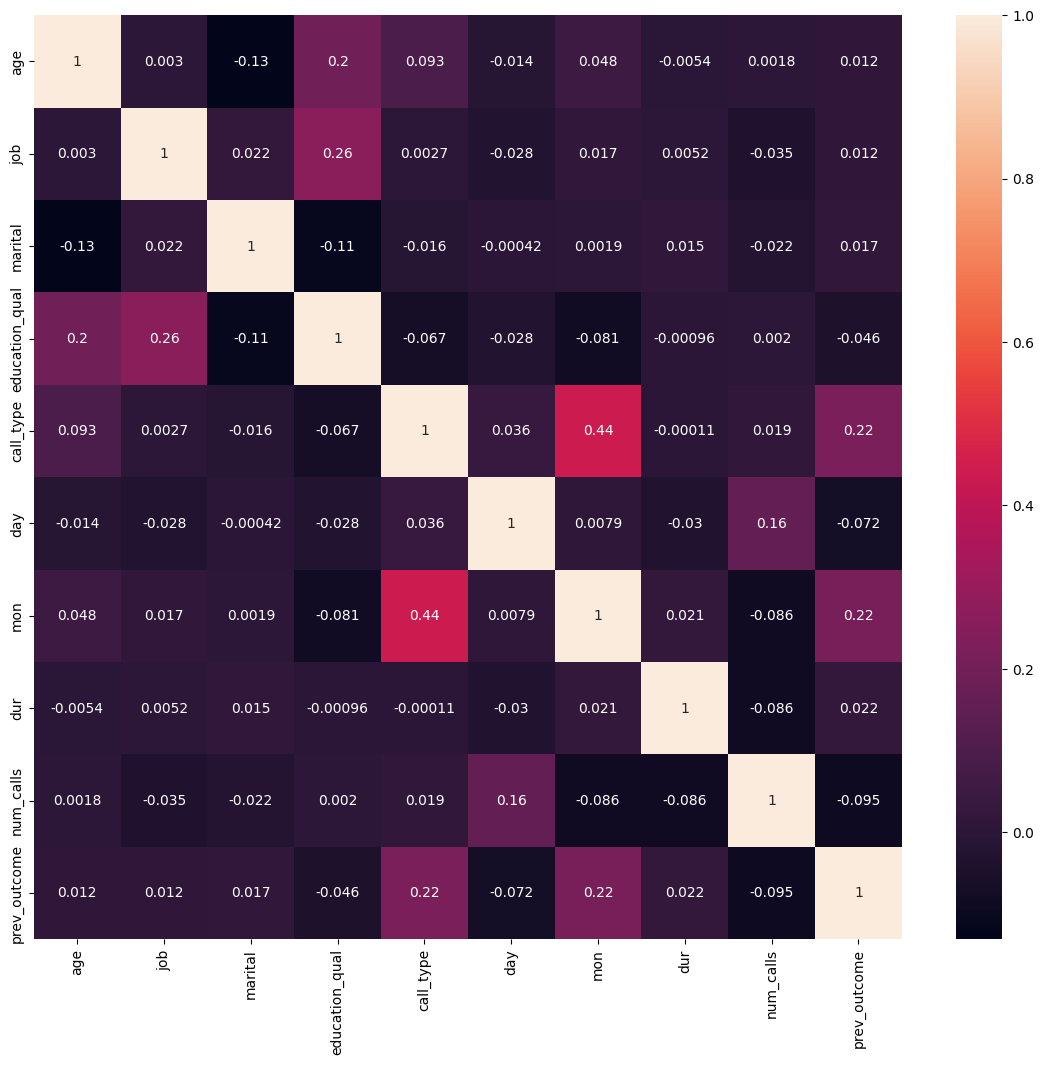

In [23]:
import seaborn as sns
plt.figure(figsize=(14,12))    #using pearson correlation
corr_map= x_train.corr()
sns.heatmap(corr_map, annot= True)
plt.xticks(rotation=90)
plt.show()

###we have to create a function to remove highly correlated features

In [24]:
def correlation(dataset, threshold):
  column_corr= set()   #set all the correlated column names
  corr_matrix= dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        columnname = corr_matrix.columns[i]
        column_corr.add(columnname)
  return column_corr


In [25]:
corr_features= correlation(x_train, 0.40)
len(set(corr_features))

1

In [26]:
corr_features

{'mon'}

In [27]:
##we have to use variance theshold function to check, if there is any consant columns to remove
from sklearn.feature_selection import VarianceThreshold
variance_th= VarianceThreshold(threshold=0)
variance_th.fit(df)
variance_th.get_support()   #there are no constant columns to remove

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [28]:
df1= pd.read_csv("/content/insurance_dataset.csv")

In [29]:
df1.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


#####in this above dataset dur column is a cotinuous variable. so we have to drop the column, in order to use mutual info classifier to determine the mutual information

In [30]:
df_mutual_info= x_train.drop("dur", axis= 1)
df_mutual_info.describe()

,age,job,marital,education_qual,call_type,day,mon,num_calls,prev_outcome
count,36164.000000,36164.000000,36164.000000,36164.000000,36164.000000,36164.000000,36164.000000,36164.000000,36164.00000
mean,40.931866,3.524887,0.511393,1.046151,0.776684,15.809285,2.935682,2.772592,0.28874
std,10.593126,3.096091,0.691263,0.966404,0.549024,8.334541,3.172651,3.109732,0.69737
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.00000
50%,39.000000,3.000000,0.000000,1.000000,1.000000,16.000000,2.000000,2.000000,0.00000
75%,48.000000,6.000000,1.000000,1.000000,1.000000,21.000000,5.000000,3.000000,0.00000
max,95.000000,11.000000,2.000000,3.000000,2.000000,31.000000,11.000000,63.000000,3.00000


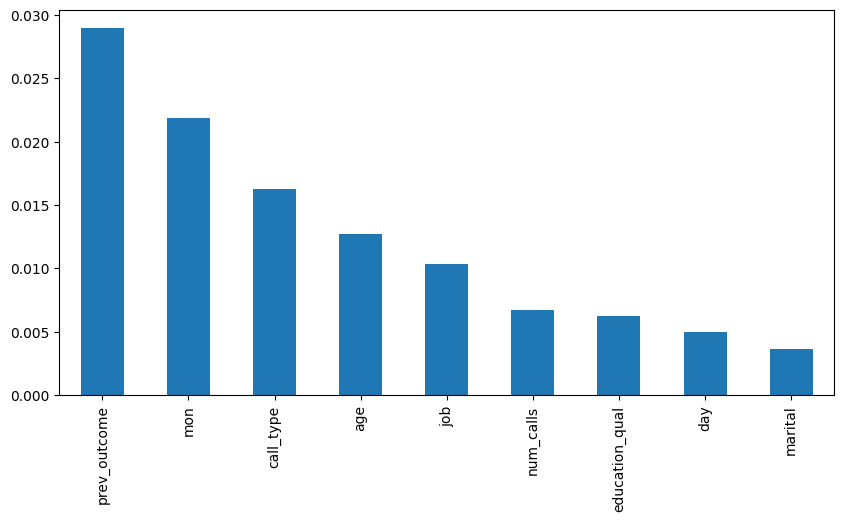

In [31]:
from sklearn.feature_selection import mutual_info_classif
mutual_info= mutual_info_classif(df_mutual_info, y_train)
mutual_info= pd.Series(mutual_info)                     #determine the mutual information
mutual_info.index= df_mutual_info.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.show()

###we have to find the best 5 features

In [32]:
from sklearn.feature_selection import SelectKBest
best_five_col= SelectKBest(mutual_info_classif, k= 5)
best_five_col.fit(x_train, y_train)
x_train.columns[best_five_col.get_support()]

Index(['age', 'call_type', 'mon', 'dur', 'prev_outcome'], dtype='object')

###From EDA and above, day column not contributing much more importance. so, we have to drop the day column

In [33]:
df2= pd.read_csv("/content/insurance_dataset.csv")

In [34]:
df_final= df2.drop("day", axis= 1)

In [35]:
df_final.head()

,age,job,marital,education_qual,call_type,mon,dur,num_calls,prev_outcome,Outcome
0,58,management,married,tertiary,unknown,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,may,198,1,unknown,no


In [36]:
from sklearn.preprocessing import OneHotEncoder
df_final["Outcome"]= df_final["Outcome"].map({"no":0,"yes":1}).astype(int)
#have to find object columns
object_list= df_final.select_dtypes(include="object").columns
df_final=pd.get_dummies(df, columns= object_list.values)
df_final.columns

Index(['age', 'day', 'dur', 'num_calls', 'Outcome', 'job_0', 'job_1', 'job_2',
       'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10',
       'job_11', 'marital_0', 'marital_1', 'marital_2', 'education_qual_0',
       'education_qual_1', 'education_qual_2', 'education_qual_3',
       'call_type_0', 'call_type_1', 'call_type_2', 'mon_0', 'mon_1', 'mon_2',
       'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8', 'mon_9', 'mon_10',
       'mon_11', 'prev_outcome_0', 'prev_outcome_1', 'prev_outcome_2',
       'prev_outcome_3'],
      dtype='object')

In [37]:
df_final.head()

,age,day,dur,num_calls,Outcome,job_0,job_1,job_2,job_3,job_4,...,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,prev_outcome_0,prev_outcome_1,prev_outcome_2,prev_outcome_3
0,58,5,261,1,0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,5,151,1,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,5,76,1,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,47,5,92,1,0,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,33,5,198,1,0,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [38]:
###Data Splitting

In [39]:
X= df_final.drop("Outcome", axis=1)
Y= df_final["Outcome"]

In [40]:
X.head()

,age,day,dur,num_calls,job_0,job_1,job_2,job_3,job_4,job_5,...,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,prev_outcome_0,prev_outcome_1,prev_outcome_2,prev_outcome_3
0,58,5,261,1,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,5,151,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,5,76,1,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,47,5,92,1,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,33,5,198,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [41]:
Y

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


###Sampling-- train and test for train our model

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size= 0.2, random_state= 0)
x_train.shape, x_test.shape

((36164, 42), (9041, 42))

In [43]:
from sklearn.preprocessing import StandardScaler
standard_scaler= StandardScaler()
standard_scaler.fit(x_train)
tr_x_train= standard_scaler.transform(x_train)
tr_x_test= standard_scaler.transform(x_test)

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

#Models

RF_model= RandomForestClassifier()
LR_model= LogisticRegression()
AB_model= AdaBoostClassifier()
KNN_model= KNeighborsClassifier()
NB_model= GaussianNB()

#to store prediction

model_accuracy= []
pred= []

models= [RF_model, LR_model, AB_model, KNN_model, NB_model]
models_name= [str(i) for i in models]

# Impute missing values
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform both training and test data
tr_x_train = imputer.fit_transform(tr_x_train)
tr_x_test = imputer.transform(tr_x_test)

for model in models:
  model.fit(tr_x_train, y_train)

  y_train_pred= model. predict_proba(tr_x_train)
  train_accuracy= roc_auc_score(y_train, y_train_pred[:,-1])*100

  y_test_pred = model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100

  print("Accuracy:{} for train:{}%, and test:{}%". format(str(model), train_accuracy, test_accuracy))
  model_accuracy.append(test_accuracy)
  pred.append(pd.Series(y_test_pred[:,-1]))

df_models_ouput= pd.concat(pred, axis= 1)
df_models_ouput. columns= models_name

df_models_ouput["final_prediction"]= df_models_ouput.mean(axis= 1)

print("Ensemble test roc_auc:{}". format(roc_auc_score(y_test, df_models_ouput["final_prediction"])))






Accuracy:RandomForestClassifier() for train:100.0%, and test:92.39436208537448%
Accuracy:LogisticRegression() for train:90.33304737988655%, and test:90.23430977001091%
Accuracy:AdaBoostClassifier() for train:90.94867692682489%, and test:90.68971033870694%
Accuracy:KNeighborsClassifier() for train:95.55872332555688%, and test:81.67859332395237%
Accuracy:GaussianNB() for train:81.6350892360438%, and test:82.05016669683364%
Ensemble test roc_auc:0.9122080469904068


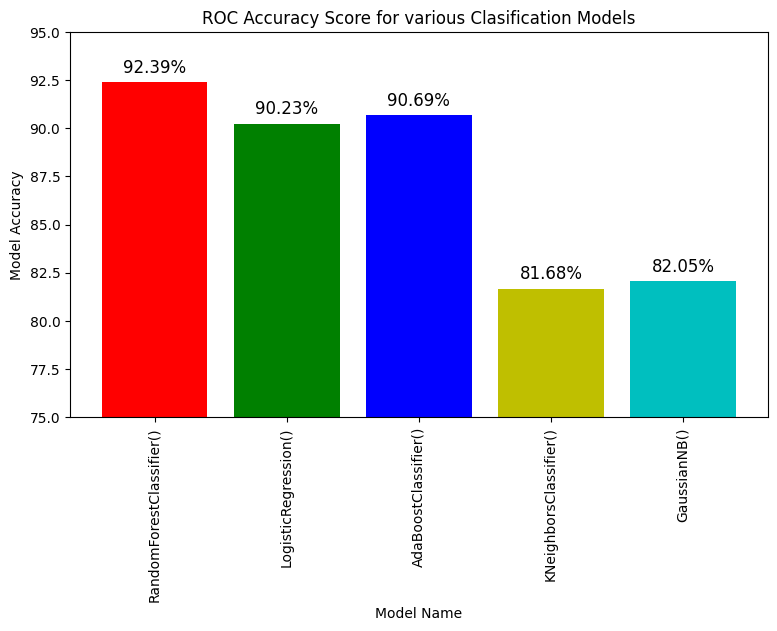

In [45]:
from seaborn import colors
plt.figure(figsize=(9,5))
plt.bar(models_name, model_accuracy, color=list("rgbyc"))
plt.xlabel("Model Name")
plt.ylabel("Model Accuracy")
plt.title("ROC Accuracy Score for various Clasification Models")

for index, data in enumerate(model_accuracy):
  plt.text(x= index, y= data+0.5, s= f"{data.round(2)}%", ha= "center", fontsize=12)
plt.ylim(75, 95)
plt.xticks(rotation= 90)
plt.show()

###Random Forest Classifier is the best model
###Performed hyperaameter tuning for the RandomForestClassifer


* Radom Forest Classifier Accuracy:92.56%



In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
for i in range(10,20):
  RF_hyper_model= RandomForestClassifier(random_state= 20, n_jobs= -1, n_estimators= i, max_features= None, min_samples_split= i+6)
  RF_hyper_model.fit(tr_x_train,y_train)
  y_test_hyper = RF_hyper_model.predict(tr_x_test)
  y_test_pred = RF_hyper_model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy for n_estimators={}, min_samples_split= {} is {} & {}". format(i, i+6, accuracy_score(y_test_hyper, y_test) * 100, test_accuracy))

Accuracy for n_estimators=10, min_samples_split= 16 is 90.42141356044685 & 91.94560603495087
Accuracy for n_estimators=11, min_samples_split= 17 is 90.31080632673377 & 92.03629962223168
Accuracy for n_estimators=12, min_samples_split= 18 is 90.45459573056078 & 92.15967863419533
Accuracy for n_estimators=13, min_samples_split= 19 is 90.3439884968477 & 92.21176628578436
Accuracy for n_estimators=14, min_samples_split= 20 is 90.56520296427387 & 92.2730324810678
Accuracy for n_estimators=15, min_samples_split= 21 is 90.42141356044685 & 92.45276728421373
Accuracy for n_estimators=16, min_samples_split= 22 is 90.24444198650592 & 92.47977158738593
Accuracy for n_estimators=17, min_samples_split= 23 is 90.32186705010507 & 92.49891106972072
Accuracy for n_estimators=18, min_samples_split= 24 is 90.42141356044685 & 92.48773566728362
Accuracy for n_estimators=19, min_samples_split= 25 is 90.46565645393208 & 92.61747309787528


###Permormed hyperparameter tuning for the  AdaBoostClasifier.


* AdaBoostClassifier Accuracy : 90.69%




In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor

for i in range(95, 105):
  Ada_hyper_model= AdaBoostClassifier(n_estimators= i, random_state= 0)
  Ada_hyper_model.fit(tr_x_train, y_train)
  y_test_hyper = Ada_hyper_model.predict(tr_x_test)
  y_test_pred= Ada_hyper_model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy for n_estimator = {} is {}".format(i, accuracy_score(y_test_hyper, y_test) * 100, test_accuracy))


Accuracy for n_estimator = 95 is 89.77989160491097
Accuracy for n_estimator = 96 is 89.75777015816834
Accuracy for n_estimator = 97 is 89.77989160491097
Accuracy for n_estimator = 98 is 89.75777015816834
Accuracy for n_estimator = 99 is 89.77989160491097
Accuracy for n_estimator = 100 is 89.77989160491097
Accuracy for n_estimator = 101 is 89.75777015816834
Accuracy for n_estimator = 102 is 89.72458798805441
Accuracy for n_estimator = 103 is 89.82413449839619
Accuracy for n_estimator = 104 is 89.82413449839619


###Calculate Confusion Matrix result for the predicted output to check accuracy of out model

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = RF_model.predict(tr_x_test)
true_neg,false_pos,false_neg,true_pos = confusion_matrix(y_test, y_pred).ravel()
true_neg,false_pos,false_neg,true_pos

(7710, 256, 647, 428)

In [49]:
confusion_matrix(y_test, y_pred)

array([[7710,  256],
       [ 647,  428]])

In [50]:
df_models_ouput.head()

,RandomForestClassifier(),LogisticRegression(),AdaBoostClassifier(),KNeighborsClassifier(),GaussianNB(),final_prediction
0,0.32,0.131490,0.492442,0.2,0.001267,0.229040
1,0.01,0.041282,0.477962,0.0,0.000780,0.106005
2,0.12,0.113308,0.490893,0.2,0.053719,0.195584
3,0.00,0.039666,0.482469,0.0,0.000013,0.104430
4,0.00,0.027762,0.480399,0.0,0.000004,0.101633


In [51]:
#calculate ROC Curve
FPR, TPR, thresholds= roc_curve(y_test, df_models_ouput["RandomForestClassifier()"].values)   #False Positive Rate, True Positive Rate
len(thresholds)

95

In [52]:
from sklearn.metrics import accuracy_score
Accuracy_Is= []

for thresh in thresholds:
  y_pred= np.where(df_models_ouput["final_prediction"].values > thresh, 1,0)
  accuracy= accuracy_score(y_test, y_pred)
  Accuracy_Is.append(accuracy)

threshold_accuracy= pd.concat([pd.Series(thresholds), pd.Series(Accuracy_Is)], axis= 1)
threshold_accuracy.columns = ["Threshold", "Accuracy"]
threshold_accuracy.sort_values(by= "Accuracy", ascending= False, inplace= True)


In [53]:
threshold_accuracy.head()

,Threshold,Accuracy
42,0.52,0.901891
41,0.53,0.901891
39,0.55,0.901449
37,0.57,0.901449
43,0.51,0.901338


###we can conclude that the Accuracy of the model is maximum at Threshold: 0.52

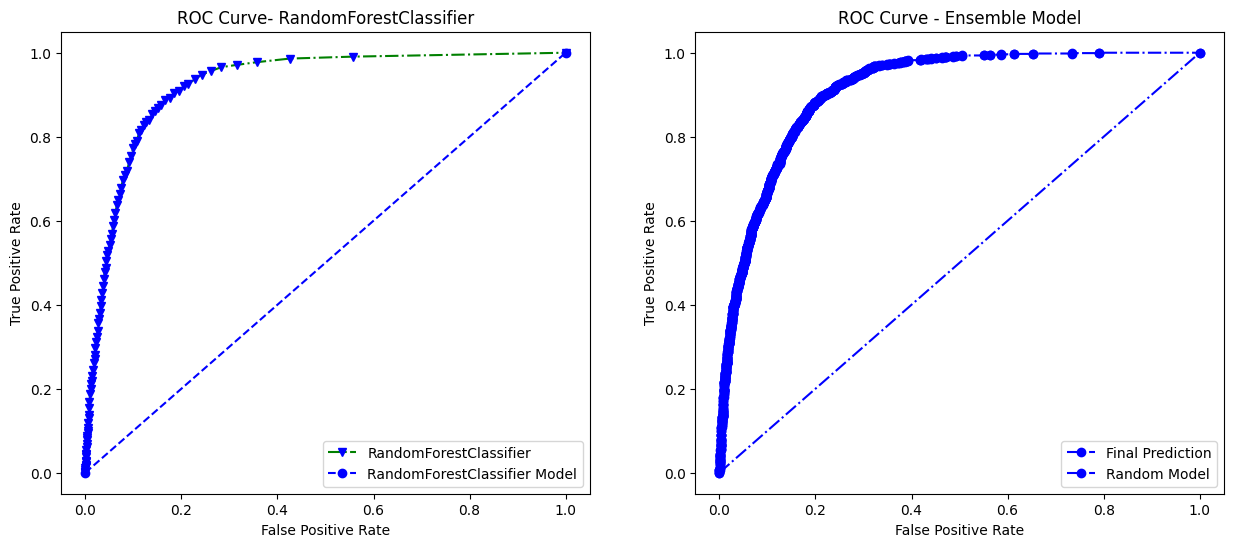

In [57]:
FPR, TPR, thresholds= roc_curve(y_test, df_models_ouput["RandomForestClassifier()"])
FPR_fi, TPR_fi, thresholds= roc_curve(y_test, df_models_ouput["final_prediction"])
plt.figure(figsize= (15, 6))
plt.subplot(1,2,1)
plt.plot(FPR, TPR, "g-.v", mfc= "b", mec= "b", label= "RandomForestClassifier")
plt.plot([0,1], [0,1], "b--o", label= "RandomForestClassifier Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve- RandomForestClassifier")
plt.legend()

plt.subplot(1,2,2)
plt.plot(FPR_fi, TPR_fi, "b-.o", mfc= "b", mec= "b", label= "Final Prediction")
plt.plot([0,1], [0,1], "b-.o", label= "Random Model")
plt.legend()

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Ensemble Model")
plt.show()


In [58]:
models= [RF_model, LR_model, AB_model, KNN_model, NB_model]
models_name= [str(i) for i in models]

models_accuracy= []
for model in models:
  y_pred= model.predict(tr_x_test)
  test_accuracy= accuracy_score(y_test, y_pred) * 100
  print("Accuracy of Model: {} is {} %". format (str(model), test_accuracy))
  models_accuracy.append(test_accuracy)

Accuracy of Model: RandomForestClassifier() is 90.01216679570844 %
Accuracy of Model: LogisticRegression() is 89.99004534896582 %
Accuracy of Model: AdaBoostClassifier() is 89.64716292445526 %
Accuracy of Model: KNeighborsClassifier() is 89.10518747926113 %
Accuracy of Model: GaussianNB() is 87.08107510231169 %


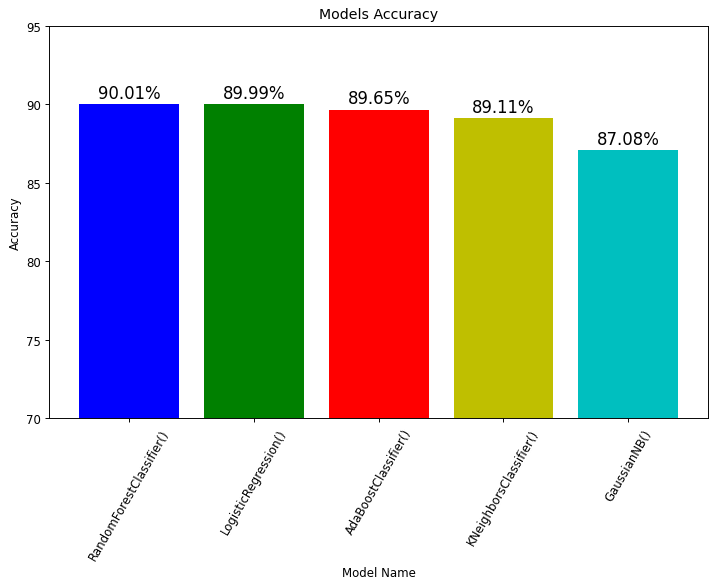

In [72]:
plt.figure(figsize= (10,6),dpi=85)
plt.bar(models_name, models_accuracy, color= list("bgryc"))
plt.ylim(70, 95)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Models Accuracy")

for index, data in enumerate(models_accuracy):
  plt.text(x= index, y= data+0.4, s= f"{data.round(2)}%",ha="center", fontsize=14)

plt.xticks(rotation= 60)
plt.show()


##Export model to a pickle file for reusing the model for prediction
Based on the Accuracy Score and did hyperparameter tuning  of models. Below is the best accuracy score that we can achieve for models:
- RandomForestClassifier: **90.01%**
- Logistic Regression: **89.99%**

Exporting the RandomForestClassifier, for predicting the output.

In [73]:
#Extract the model to a Pickle file
import pickle
pickle_out = open("RF_model.pkl", "wb")
pickle.dump(RF_hyper_model, pickle_out)
pickle_out.close

<function BufferedWriter.close>